In [1]:
import requests
from bs4 import BeautifulSoup
from lxml import etree
import json
import re
import multiprocessing
# import xlwt
import time
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'

In [2]:
#总分榜单
jinjiang = 'https://www.jjwxc.net/topten.php?orderstr=7&t=1'
#'https://www.jjwxc.net/bookbase_slave.php?t=0&booktype=&opt=&page=1&endstr=true&orderstr=4'

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                        'AppleWebKit/537.36 (KHTML, like Gecko) '
                        'Chrome/92.0.4515.107 Safari/537.36 Edg/92.0.902.55'}
response = requests.get(jinjiang, headers=header)
print(response.status_code)

200


In [3]:
# change to Chinese
response.encoding = response.apparent_encoding

print(response.text)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
    <head>
        <meta http-equiv="Content-Type" content="text/html; charset=gb18030"/>
        <meta http-equiv="X-UA-Compatible" content="IE=EmulateIE7"/>
                    <meta name="description" content="总分排行榜_晋江文学城
晋江文学城总分排行榜,是网站小说作品总积分排行榜。"/>
            <meta name="keywords" content="晋江文学城，作品总分排行，言情小说排行，纯爱小说排行，衍生小说排行，轻小说排行">
            <title>晋江文学城[总分排行榜]_按规定时间内作品积分排序</title>
                <link href="//s9-static.jjwxc.net/css/index.css" rel="stylesheet" type="text/css"/>
        <style>
            .current {font-weight: bold;color: red;}
        </style>
    </head>
    <body topmargin="0">
                        <link href="//static.jjwxc.net/css/channel_2010/index2010.css?ver=2022070803"
      rel="stylesheet"
      type="text/css"
      media="screen"/>
<style>
    #showNovelTro {position: absolute;dis

In [141]:
# 清洗+提取信息
# Xpath
htmls = etree.HTML(response.text)
# book_name = htmls.xpath('//a[@class="tooltip"]/text()')
# print(book_name)

# print(htmls.xpath('//tbody//td//a/text()')) # author + title

# print(htmls.xpath('//tbody//td[2]//a/@href')) #
# print(htmls.xpath('//tbody//td[2]//a/@title')) # author
ls_author = htmls.xpath('//tbody//td[2]//a/@title')
ls_author_href = htmls.xpath('//tbody//td[2]//a/@href')

# print(htmls.xpath('//a[@class="tooltip"]/@rel')) #
# print(htmls.xpath('//a[@class="tooltip"]/@title')) # title
# print(htmls.xpath('//a[@class="tooltip"]/@href')) #
ls_title = htmls.xpath('//a[@class="tooltip"]/@title')
ls_title_href = htmls.xpath('//a[@class="tooltip"]/@href')
ls_rel = htmls.xpath('//a[@class="tooltip"]/@rel')

# print(htmls.xpath('//tbody//td[@align="center"][3]/text()')) # style (轻松 or 正剧)
# print(htmls.xpath('//tbody//td[@align="center"][5]/text()')) # time
ls_style = []
for style in htmls.xpath('//tbody//td[@align="center"][3]/text()'):
    st = str(style).strip(' ')
    ls_style.append(st)
    # print(len(st))
ls_time = htmls.xpath('//tbody//td[@align="center"][5]/text()')

# print(htmls.xpath('//tbody//td[@align="right"][1]/text()')) # words
# print(htmls.xpath('//tbody/tr/td[8]/text()')) # credits
ls_credits = htmls.xpath('//tbody/tr/td[8]/text()')[2:]
ls_words = []
for word in htmls.xpath('//tbody//td[@align="right"][1]/text()'):
    wd = str(word).strip(' ')
    ls_words.append(int(wd))
    # print(len(wd))

In [247]:

# print(htmls.xpath('//tbody/tr/td[8]/text()')[2:]) # credits

In [101]:
# bs = BeautifulSoup(response.text, 'lxml')
# print(bs)

# 正则表达式吧。。。。

In [193]:
# create pandas frame

dic = {'author': ls_author, 'author_link': ls_author_href,
       'title': ls_title, 'book_link': ls_title_href, 'intro': ls_rel,
       'time': ls_time, 'style': ls_style, 'words_num': ls_words, 'credits': ls_credits}
df = pd.DataFrame(dic)

df['year'] = df['time'].str.extract('(^\d{4})', expand=True)
print(df)

    author                    author_link       title  \
0      木苏里  oneauthor.php?authorid=966799        全球高考   
1      木苏里  oneauthor.php?authorid=966799          某某   
2       淮上  oneauthor.php?authorid=294665          破云   
3       淮上  oneauthor.php?authorid=294665       破云2吞海   
4      木苏里  oneauthor.php?authorid=966799          判官   
..     ...                            ...         ...   
195    青梅酱  oneauthor.php?authorid=423251     电竞魔王集结营   
196    春风遥  oneauthor.php?authorid=976658  天雷能有什么坏心思呢   
197     巫哲  oneauthor.php?authorid=570049     我就是来借个火   
198    林知落  oneauthor.php?authorid=494127    虐渣剧情引起舒适   
199     龙柒  oneauthor.php?authorid=729526     想飞升就谈恋爱   

                       book_link  \
0    onebook.php?novelid=3419133   
1    onebook.php?novelid=3173202   
2    onebook.php?novelid=3395943   
3    onebook.php?novelid=3617495   
4    onebook.php?novelid=3515679   
..                           ...   
195  onebook.php?novelid=4079467   
196  onebook.php?novelid=60

In [153]:
# write to excel

df.to_excel('danmei.xlsx', index=False)

数据分析
1. 整体分析

In [231]:
# df

In [6]:
# 前二百小说-作者出现次数统计

df_author = df[['author_link', 'author']].groupby('author').agg('count')

df_author1 = df_author.loc[df_author['author_link'] > 1]
df_author1
# .plot(kind='bar')

,author_link
author,
priest,9
一十四洲,4
公子于歌,2
北南,4
即墨遥,2
吕天逸,3
巫哲,10
微风几许,2
拉棉花糖的兔子,7


In [7]:
df_author1.sort_values('author_link', inplace=True, ascending=False)

C:\Users\Julia\AppData\Local\Temp\ipykernel_1640\1355188211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_author1.sort_values('author_link', inplace=True, ascending=False)


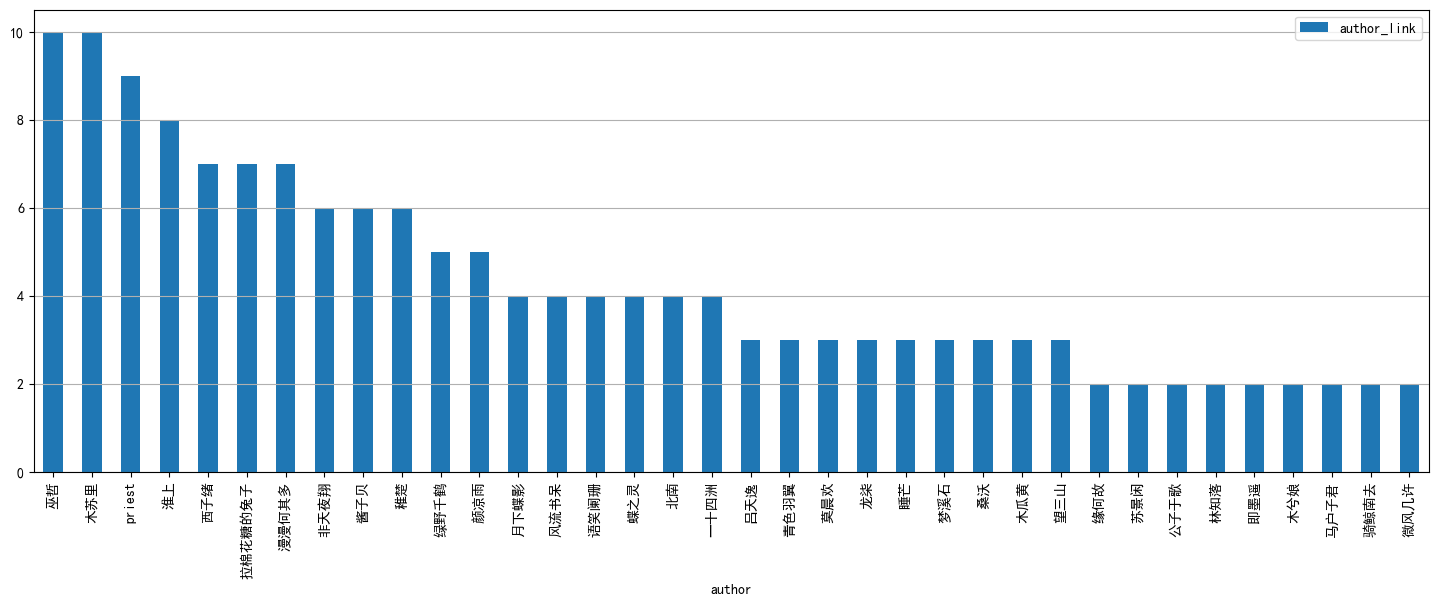

In [225]:
df_author1.plot(kind='bar', figsize=(18, 6))
plt.grid(axis='y')
plt.savefig('year_author', bbox_inches='tight')

In [9]:
# 前二百小说类型统计

df_style = df[['style', 'title']].groupby('style').agg('count')
df_style

,title
style,
正剧,66
爆笑,5
轻松,129


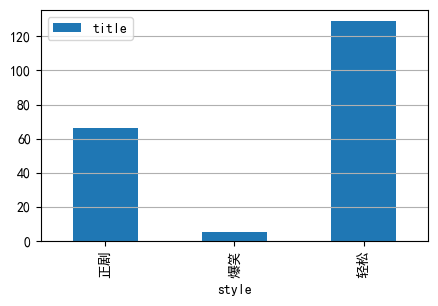

In [226]:
df_style.plot(kind='bar', figsize=(5, 3))
plt.grid(axis='y')
plt.savefig('./images/style', bbox_inches='tight')

In [11]:
# 发布年份统计

df_time = df[['time', 'year']]
df_year = df_time.groupby('year').agg('count')
df_year

,time
year,
2012,1
2013,2
2014,4
2015,12
2016,15
2017,22
2018,37
2019,38
2020,39


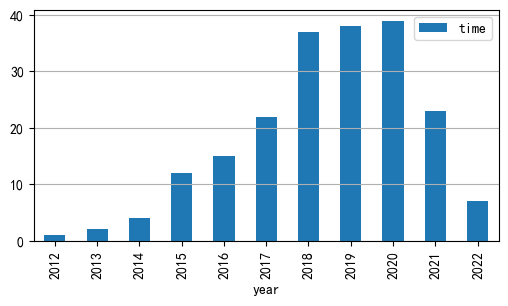

In [228]:
df_year.plot(kind='bar', figsize=(6, 3))
plt.grid(axis='y')
plt.savefig('./images/year', bbox_inches='tight')

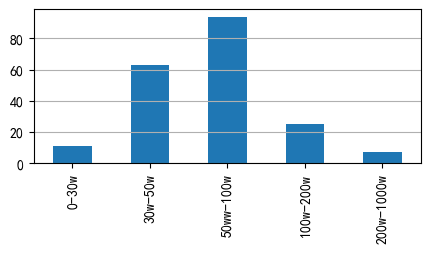

In [230]:
# 字数统计
# words

# 组间距离
bins = [0, 300000, 500000, 1000000, 2000000, 10000000]
agesgroup = pd.cut(ls_words, bins)
nn = agesgroup.value_counts()
nn.plot(kind='bar', figsize=(5, 2))
plt.grid(axis="y")
# 更改横坐标的名字
plt.xticks(range(0, 5, 1), ('0-30w', '30w-50w', '50ww-100w', '100w-200w', '200w-1000w'))

# plt.grid(axis='y')
plt.savefig('./images/words', bbox_inches='tight')

In [155]:
nn

(0, 300000]            11
(300000, 500000]       63
(500000, 1000000]      94
(1000000, 2000000]     25
(2000000, 10000000]     7
dtype: int64

2. 两者之间的关系

2.1 字数和排名之间的

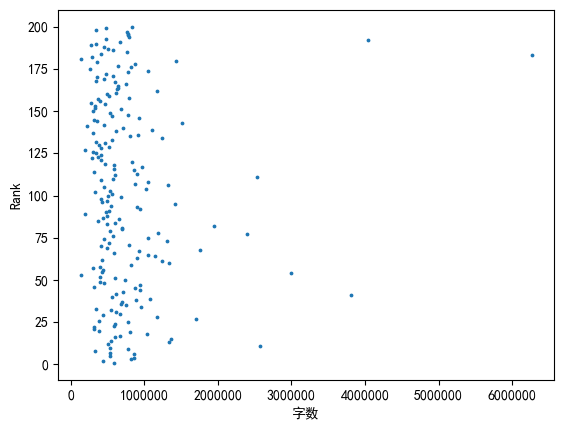

In [232]:
# 字数and rank

import numpy as np

np.set_printoptions(suppress=True, formatter={'float_kind': '{:.4f}'.format})
# 字数排名的散点图
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')
# ax.scatter([*reversed(ls_words)], [*reversed(range(1, 201))], s=3)
ax.scatter(ls_words, range(1, 201), s=3)
# ax.set_xticks(np.arange(0,7000000,700000))

# plt.figure(figsize=(5, 3))
# plt.scatter(ls_words, range(1, 201))
plt.xlabel('字数')
plt.ylabel('Rank')
# plt.xticks(np.arange(0,7000000,700000))
# plt.grid(axis='y')
plt.savefig('./images/words_rank', bbox_inches='tight')

In [196]:
df['year'].values
ls_year = list(int(i[0]) for i in df[['year']].values.tolist())
# ls_year

[2018,
 2019,
 2017,
 2019,
 2020,
 2018,
 2020,
 2018,
 2018,
 2021,
 2020,
 2019,
 2017,
 2019,
 2018,
 2018,
 2020,
 2018,
 2016,
 2018,
 2019,
 2018,
 2018,
 2020,
 2017,
 2022,
 2021,
 2017,
 2019,
 2017,
 2018,
 2020,
 2019,
 2017,
 2017,
 2018,
 2018,
 2021,
 2021,
 2020,
 2021,
 2015,
 2020,
 2021,
 2017,
 2018,
 2020,
 2019,
 2017,
 2020,
 2018,
 2016,
 2020,
 2012,
 2018,
 2019,
 2017,
 2019,
 2019,
 2020,
 2015,
 2019,
 2016,
 2021,
 2016,
 2018,
 2018,
 2018,
 2019,
 2017,
 2019,
 2019,
 2019,
 2019,
 2017,
 2020,
 2019,
 2020,
 2014,
 2018,
 2019,
 2020,
 2021,
 2021,
 2018,
 2018,
 2020,
 2015,
 2019,
 2020,
 2020,
 2015,
 2018,
 2019,
 2021,
 2020,
 2020,
 2019,
 2020,
 2021,
 2019,
 2019,
 2015,
 2018,
 2018,
 2019,
 2021,
 2018,
 2021,
 2017,
 2020,
 2020,
 2020,
 2015,
 2015,
 2018,
 2022,
 2014,
 2022,
 2021,
 2019,
 2015,
 2020,
 2020,
 2019,
 2016,
 2016,
 2019,
 2020,
 2020,
 2017,
 2020,
 2017,
 2016,
 2021,
 2019,
 2017,
 2016,
 2022,
 2019,
 2018,
 2018,
 2017,

In [198]:
ls_rwat = [*zip(range(1, 201), ls_words, ls_author, ls_title, ls_style, ls_year)]
ls_rwat

[(1, 589514, '木苏里', '全球高考', '轻松', 2018),
 (2, 438115, '木苏里', '某某', '正剧', 2019),
 (3, 817364, '淮上', '破云', '正剧', 2017),
 (4, 855167, '淮上', '破云2吞海', '正剧', 2019),
 (5, 539210, '木苏里', '判官', '轻松', 2020),
 (6, 857083, '西子绪', '死亡万花筒', '正剧', 2018),
 (7, 539391, '酱子贝', '我行让我来[电竞]', '轻松', 2020),
 (8, 330466, '漫漫何其多', 'AWM[绝地求生]', '轻松', 2018),
 (9, 783098, 'priest', '烈火浇愁', '正剧', 2018),
 (10, 533344, '木苏里', '不见上仙三百年', '正剧', 2021),
 (11, 2573685, '壶鱼辣椒', '我在无限游戏里封神', '正剧', 2020),
 (12, 510136, '漫漫何其多', 'FOG[电竞]', '轻松', 2019),
 (13, 1341652, '莫晨欢', '地球上线', '轻松', 2017),
 (14, 545594, '巫哲', '嚣张', '轻松', 2019),
 (15, 1369880, '骑鲸南去', '不要在垃圾桶里捡男朋友[快穿]', '轻松', 2018),
 (16, 603363, '巫哲', '轻狂', '轻松', 2018),
 (17, 666341, '稚楚', '营业悖论[娱乐圈]', '轻松', 2020),
 (18, 1042318, '唐酒卿', '将进酒', '正剧', 2018),
 (19, 801097, 'priest', '默读', '正剧', 2016),
 (20, 382080, '漫漫何其多', '当年万里觅封侯', '轻松', 2018),
 (21, 313845, '一十四洲', '小蘑菇', '正剧', 2019),
 (22, 314335, '绿野千鹤', '迪奥先生', '爆笑', 2018),
 (23, 589362, '巫哲', '解药', '轻松', 2018),
 (2

In [220]:
stop = 5
cnt = 0
for ele in ls_rwat:
    # if cnt != stop:
    #     print(ele)
    #     cnt += 1

    # if ele[1] == max(ls_words):
    #     print('字数最多的作品：', ele)
    # if ele[1] == min(ls_words):
    #     print('字数最少的作品：', ele)

    # if ele[-1] <= 2014:
    #     print('2014年及以前的作品：', ele)
    if ele[-1] == 2022:
        print('2022年: ', ele)

2022年:  (26, 381489, '酱子贝', '放学等我', '轻松', 2022)
2022年:  (117, 972594, '蝶之灵', '金牌教练（电竞）', '轻松', 2022)
2022年:  (119, 472609, '稚楚', '悬日', '正剧', 2022)
2022年:  (139, 1103753, '芷衣', '咸鱼小丧尸[无限]', '轻松', 2022)
2022年:  (157, 374500, '林七年', '别想掰弯我', '轻松', 2022)
2022年:  (160, 497036, '马户子君', '穿成阴鸷反派的联姻对象', '轻松', 2022)
2022年:  (173, 783610, '望三山', '被将军掳走之后', '轻松', 2022)


2.1 年份与style

In [17]:
# 近些年style的变化

df1 = df[['year', 'style', 'author']]
df11 = df1.groupby(['year', 'style']).agg('count')

In [18]:
df11

author
year style        
2012 正剧          1
2013 正剧          2
2014 正剧          3
     轻松          1
2015 正剧          5
     轻松          7
2016 正剧          9
     轻松          6
2017 正剧          9
     轻松         13
2018 正剧          9
     爆笑          1
     轻松         27
2019 正剧         11
     爆笑          1
     轻松         26
2020 正剧         10
     爆笑          2
     轻松         27
2021 正剧          6
     爆笑          1
     轻松         16
2022 正剧          1
     轻松          6

In [36]:
# type(df11)
# df11.columns
ls_df11idx = []
for idx in df11.index:
    ls_df11idx.append(idx)
ls_df11idx

[('2012', '正剧'),
 ('2013', '正剧'),
 ('2014', '正剧'),
 ('2014', '轻松'),
 ('2015', '正剧'),
 ('2015', '轻松'),
 ('2016', '正剧'),
 ('2016', '轻松'),
 ('2017', '正剧'),
 ('2017', '轻松'),
 ('2018', '正剧'),
 ('2018', '爆笑'),
 ('2018', '轻松'),
 ('2019', '正剧'),
 ('2019', '爆笑'),
 ('2019', '轻松'),
 ('2020', '正剧'),
 ('2020', '爆笑'),
 ('2020', '轻松'),
 ('2021', '正剧'),
 ('2021', '爆笑'),
 ('2021', '轻松'),
 ('2022', '正剧'),
 ('2022', '轻松')]

In [67]:
df11_del_idx = df11.reset_index()
type(df11_del_idx)

# df11_del_idx[['author']].values.tolist()

ls_value = list(int(i[0]) for i in df11_del_idx[['author']].values.tolist())
ls_value

[1, 2, 3, 1, 5, 7, 9, 6, 9, 13, 9, 1, 27, 11, 1, 26, 10, 2, 27, 6, 1, 16, 1, 6]

In [68]:
dic_yt = dict(zip(ls_df11idx, ls_value))
dic_yt

{('2012', '正剧'): 1,
 ('2013', '正剧'): 2,
 ('2014', '正剧'): 3,
 ('2014', '轻松'): 1,
 ('2015', '正剧'): 5,
 ('2015', '轻松'): 7,
 ('2016', '正剧'): 9,
 ('2016', '轻松'): 6,
 ('2017', '正剧'): 9,
 ('2017', '轻松'): 13,
 ('2018', '正剧'): 9,
 ('2018', '爆笑'): 1,
 ('2018', '轻松'): 27,
 ('2019', '正剧'): 11,
 ('2019', '爆笑'): 1,
 ('2019', '轻松'): 26,
 ('2020', '正剧'): 10,
 ('2020', '爆笑'): 2,
 ('2020', '轻松'): 27,
 ('2021', '正剧'): 6,
 ('2021', '爆笑'): 1,
 ('2021', '轻松'): 16,
 ('2022', '正剧'): 1,
 ('2022', '轻松'): 6}

In [70]:

aim_years = [*range(2012, 2023)]
aim_types = ['正剧', '轻松', '爆笑']

ls_check = []
for y in aim_years:
    for t in aim_types:
        ls_check.append((str(y), str(t)))
        # print(y, t)
ls_check

[('2012', '正剧'),
 ('2012', '轻松'),
 ('2012', '爆笑'),
 ('2013', '正剧'),
 ('2013', '轻松'),
 ('2013', '爆笑'),
 ('2014', '正剧'),
 ('2014', '轻松'),
 ('2014', '爆笑'),
 ('2015', '正剧'),
 ('2015', '轻松'),
 ('2015', '爆笑'),
 ('2016', '正剧'),
 ('2016', '轻松'),
 ('2016', '爆笑'),
 ('2017', '正剧'),
 ('2017', '轻松'),
 ('2017', '爆笑'),
 ('2018', '正剧'),
 ('2018', '轻松'),
 ('2018', '爆笑'),
 ('2019', '正剧'),
 ('2019', '轻松'),
 ('2019', '爆笑'),
 ('2020', '正剧'),
 ('2020', '轻松'),
 ('2020', '爆笑'),
 ('2021', '正剧'),
 ('2021', '轻松'),
 ('2021', '爆笑'),
 ('2022', '正剧'),
 ('2022', '轻松'),
 ('2022', '爆笑')]

In [72]:
for checker in ls_check:
    if dic_yt.get(checker) == None:
        dic_yt[checker] = 0

In [78]:
dic_yt

{('2012', '正剧'): 1,
 ('2013', '正剧'): 2,
 ('2014', '正剧'): 3,
 ('2014', '轻松'): 1,
 ('2015', '正剧'): 5,
 ('2015', '轻松'): 7,
 ('2016', '正剧'): 9,
 ('2016', '轻松'): 6,
 ('2017', '正剧'): 9,
 ('2017', '轻松'): 13,
 ('2018', '正剧'): 9,
 ('2018', '爆笑'): 1,
 ('2018', '轻松'): 27,
 ('2019', '正剧'): 11,
 ('2019', '爆笑'): 1,
 ('2019', '轻松'): 26,
 ('2020', '正剧'): 10,
 ('2020', '爆笑'): 2,
 ('2020', '轻松'): 27,
 ('2021', '正剧'): 6,
 ('2021', '爆笑'): 1,
 ('2021', '轻松'): 16,
 ('2022', '正剧'): 1,
 ('2022', '轻松'): 6,
 ('2012', '轻松'): 0,
 ('2012', '爆笑'): 0,
 ('2013', '轻松'): 0,
 ('2013', '爆笑'): 0,
 ('2014', '爆笑'): 0,
 ('2015', '爆笑'): 0,
 ('2016', '爆笑'): 0,
 ('2017', '爆笑'): 0,
 ('2022', '爆笑'): 0}

In [108]:
data = []
ayear = []

for k in sorted(dic_yt):
    ayear.append(dic_yt[k])
    # print(k[1])
    if len(ayear) == 3:
        data.append(ayear)
        ayear = []
data

[[1, 0, 0],
 [2, 0, 0],
 [3, 0, 1],
 [5, 0, 7],
 [9, 0, 6],
 [9, 0, 13],
 [9, 1, 27],
 [11, 1, 26],
 [10, 2, 27],
 [6, 1, 16],
 [1, 0, 6]]

In [118]:
columns = pd.Index(aim_types, name='Style')
df_yt = pd.DataFrame(data, index=aim_years, columns=columns)

In [119]:
df_yt

Style,正剧,轻松,爆笑
2012,1,0,0
2013,2,0,0
2014,3,0,1
2015,5,0,7
2016,9,0,6
2017,9,0,13
2018,9,1,27
2019,11,1,26
2020,10,2,27
2021,6,1,16


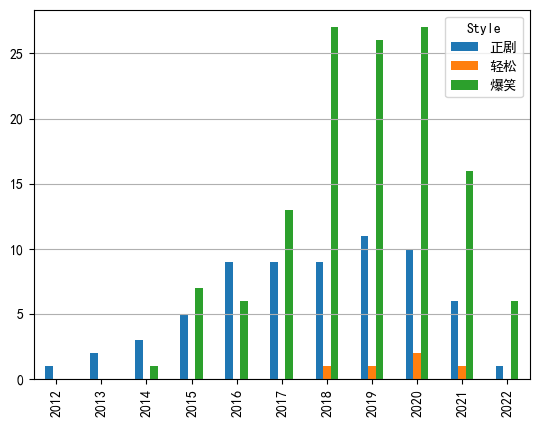

In [233]:
df_yt.plot.bar()
plt.grid(axis='y')
plt.savefig('./images/year_style', bbox_inches='tight')

In [101]:
# df_test = pd.DataFrame({'year':dic_yt.keys(),'style':dic_yt.keys(),'count':dic_yt.values()})


2.2 每个作者（选几个）
每一年的字数

In [138]:

df2 = df[df['author'] == '淮上']



In [205]:
df[df['author'] == 'priest']

,author,author_link,title,book_link,intro,time,style,words_num,credits,year
8,priest,oneauthor.php?authorid=145956,烈火浇愁,onebook.php?novelid=3886659,<br>“在岩浆的浪尖上，有烧不完的余烬。”<br>古穿今，年下。<br>感谢老福特上“橙子...,2018-12-31 18:00:00,正剧,783098,"22,292,107,264 \r\n ...",2018
18,priest,oneauthor.php?authorid=145956,默读,onebook.php?novelid=2771073,<br>童年，成长经历，家庭背景，社会关系，创伤……<br>我们不断追溯与求索犯罪者的动机，...,2016-06-15 11:00:00,正剧,801097,"16,950,684,672 \r\n ...",2016
33,priest,oneauthor.php?authorid=145956,残次品,onebook.php?novelid=3121357,“这是最好的时代，也是最坏的时代。”——狄更斯《双城记》<br> “我带着深藏骨血的仇恨...,2017-04-05 11:00:00,正剧,959253,"13,255,017,472 \r\n ...",2017
41,priest,oneauthor.php?authorid=145956,杀破狼,onebook.php?novelid=2322969,<br>HE【信我=w=<br>温柔贤惠病娇年下攻VS废柴聋瞎受【信我=w=<br>非主流蒸...,2015-01-23 20:00:38,正剧,611067,"11,174,267,904 \r\n ...",2015
63,priest,oneauthor.php?authorid=145956,太岁,onebook.php?novelid=5502413,<br>“如果有选择，我只想做红尘中一只小小蝼蚁，懵懂而生，庸碌到死，在金平城的大雾下，终生...,2021-02-09 11:04:21,正剧,1144885,"8,603,832,320 \r\n ...",2021
78,priest,oneauthor.php?authorid=145956,六爻,onebook.php?novelid=2134415,<br>修真故事，讲一个没落门派如何在臭美猴，捣蛋精，刻薄鬼，二百五和小杂毛的手里重振的故事...,2014-06-13 20:05:03,正剧,529422,"7,783,473,152 \r\n ...",2014
121,priest,oneauthor.php?authorid=145956,过门,onebook.php?novelid=2495960,那门是窄的，路是小的——马太福音<br>更新时间为每天中午11:00，有意外会挂请假条=w=...,2015-07-26 11:00:04,轻松,292629,"6,099,576,320 \r\n ...",2015
143,priest,oneauthor.php?authorid=145956,大哥,onebook.php?novelid=1811029,少年魏谦，十三四岁没爹没娘，带着个拖油瓶小妹妹，艰难地生活，还捡到了死皮赖脸缠上了他的流浪儿...,2013-06-14 20:05:05,正剧,360172,"5,621,861,888 \r\n ...",2013
169,priest,oneauthor.php?authorid=145956,山河表里,onebook.php?novelid=2016178,<br>讲一个双向暗恋的大冒险故事<br>注意是奇幻文，请大家不要被序章误导。<br>CP：...,2014-02-15 11:10:11,正剧,355312,"4,969,300,992 \r\n ...",2014


2. 分作者分析